
Lidan Avisar


## Overview
### Due December 1st

Instructions:

This notebook is an interactive assignment; please read and follow the instructions in each cell.

Assignments are to be turned in individually, you can collaborate with one classmate.

Cells that require your input (in the form of code or written response) will have 'Question #' above.

After completing the assignment, please submit this notebook. YOU MUST SUBMIT EACH HOMEWORK, even if your partner submits!

Upload your completed assignment on moodle.

In [ ]:
! pip install librosa

# Understanding Sound

For this portion of the assignment, you will load your unique wav file from
https://drive.google.com/drive/folders/122l65r1FZcHyRt4bfjIi4HRg_mVLKc1T?usp=sharing

Please enter your first and last name, like below, to get the name of your audio file.


In [50]:
your_firstname = "Lidan"
your_lastname = "Avisar"
print(f"{your_firstname[0]}.{your_lastname}.wav")

L.Avisar.wav


Your task is to listen and examine your file and try to recreate it with sin waves.

Hints :)
- The length of each frequency used is 3-7 seconds
- Each frequency is set to start at exactly the start of a second
- The amplitudes used are [0.5, 1, 1.5, 2, 2.5]
- Think of all we learned in class (sample rate, wave forms, adding waves, spectrogram, etc.)
- These may be helpful for you
 - http://librosa.org/doc/0.8.1/generated/librosa.display.waveplot.html
  - https://librosa.org/doc/main/generated/librosa.stft.html

In [ ]:
import librosa
import librosa.display as dsp
import pandas as pd
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np

### Modify the line below with your WAV file:
y, sample_rate = librosa.load("/content/sounds/G.Ben horin.wav")

Audio(data=y,rate=sample_rate)

##### Question 1 [15 points]
Reconstruct your wav file using sin waves. Use whatever approach you can think of. Google is your friend if you need it.

Make sure to play your version and also show the difference between the original and your reconstruction.

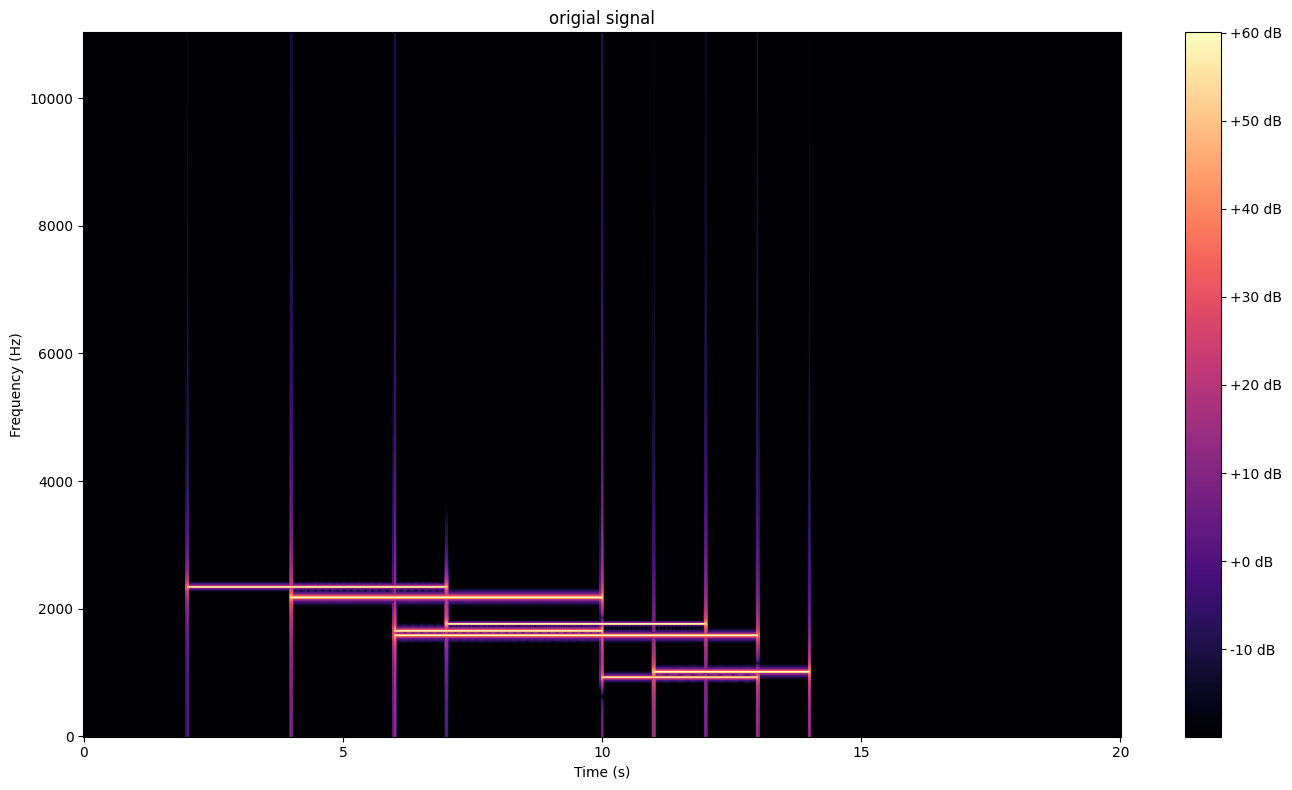

In [ ]:
import scipy.io.wavfile as wav
from scipy.signal import find_peaks
import numpy as np
import librosa

# Calculate the Short-Time Fourier Transform (STFT)
y_stft = librosa.stft(y)
y_db = librosa.amplitude_to_db(abs(y_stft))

plt.figure(figsize=(14, 8))
librosa.display.specshow(y_db, sr=sample_rate, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title("origial signal")
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()
plt.show()

Playing the layered audio:


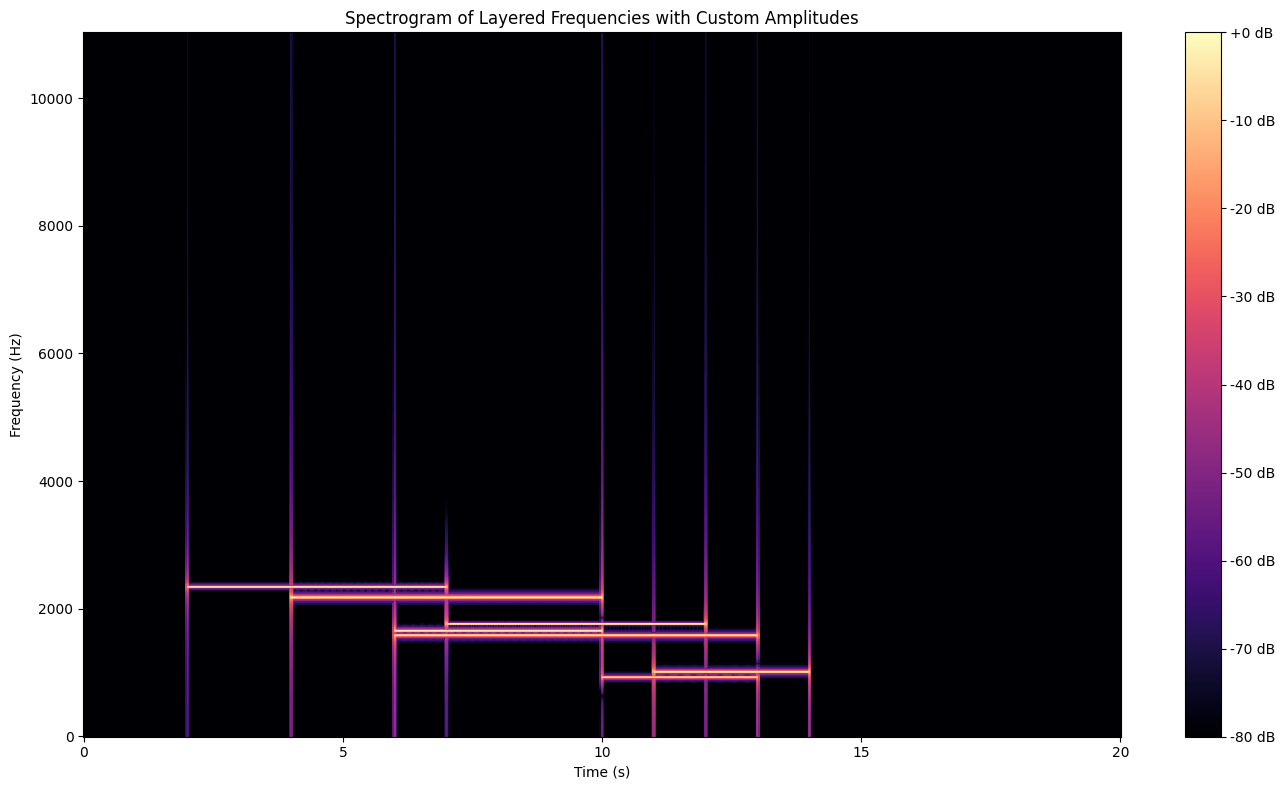

In [ ]:
# Example frequency timings and amplitudes
frequency_timings = [
    (10, 13),  # Frequency 1: Start at 10s, End at 13s
    (11, 14),  # Frequency 2: Start at 11s, End at 14s
    (6, 13),   # Frequency 3: Start at 6s, End at 13s
    (6, 10),   # Frequency 4: Start at 6s, End at 10s
    (7, 12),   # Frequency 5: Start at 7s, End at 12s
    (4, 10),   # Frequency 6: Start at 4s, End at 10s
    (2, 7)     # Frequency 7: Start at 2s, End at 7s
]

# Calculate the magnitude spectrum using FFT
D = np.fft.fft(y)
frequencies = np.fft.fftfreq(len(D), 1 / sample_rate)
magnitude = np.abs(D)
phase = np.angle(D)

# Find the peaks in the magnitude spectrum
peaks, _ = find_peaks(magnitude, height=12000, distance=500, prominence=100)

# Collect non-zero frequencies and sort them
unique_freqs = sorted([frequencies[peak] for peak in peaks if frequencies[peak] > 0])

# Corresponding amplitudes for each frequency
amplitudes = [
    1.0,  # Amplitude for Frequency 1
    2.0,  # Amplitude for Frequency 2
    1.5,  # Amplitude for Frequency 3
    1.5,  # Amplitude for Frequency 4
    1.5,  # Amplitude for Frequency 5
    2.0,  # Amplitude for Frequency 6
    1.0   # Amplitude for Frequency 7
]

# Ensure we don't exceed the number of available frequencies
frequency_timings = frequency_timings[:len(unique_freqs)]
amplitudes = amplitudes[:len(unique_freqs)]

# Generate layered audio
total_duration = 20  # Total audio duration in seconds
reconstructed_signal = np.zeros(int(sample_rate * total_duration))

# Phase shift in radians
phase_shift = 0

# Generate layered audio
for freq, (start_time, end_time), amp in zip(unique_freqs, frequency_timings, amplitudes):
    start_sample = int(start_time * sample_rate)
    end_sample = int(end_time * sample_rate)
    num_samples = end_sample - start_sample

    # Correctly generate the time array for this specific segment
    t = np.linspace(0, num_samples / sample_rate, num_samples, endpoint=False)

    # Create a sine wave for this frequency with the specified amplitude and phase
    sine_wave = amp * np.sin(2 * np.pi * freq * t + phase_shift)

    # Add sine wave to the total audio, ensuring it only layers in its defined range
    reconstructed_signal[start_sample:end_sample] += sine_wave

# Save and play the combined layered audio
print("Playing the layered audio:")
display(Audio(data=reconstructed_signal, rate=sample_rate))

# Compute the spectrogram of the combined audio
layered_D = np.abs(librosa.stft(reconstructed_signal))
layered_S_db = librosa.amplitude_to_db(layered_D, ref=np.max)

# Plot the spectrogram of the layered audio
plt.figure(figsize=(14, 8))
librosa.display.specshow(layered_S_db, sr=sample_rate, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram of Layered Frequencies with Custom Amplitudes")
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()
plt.show()


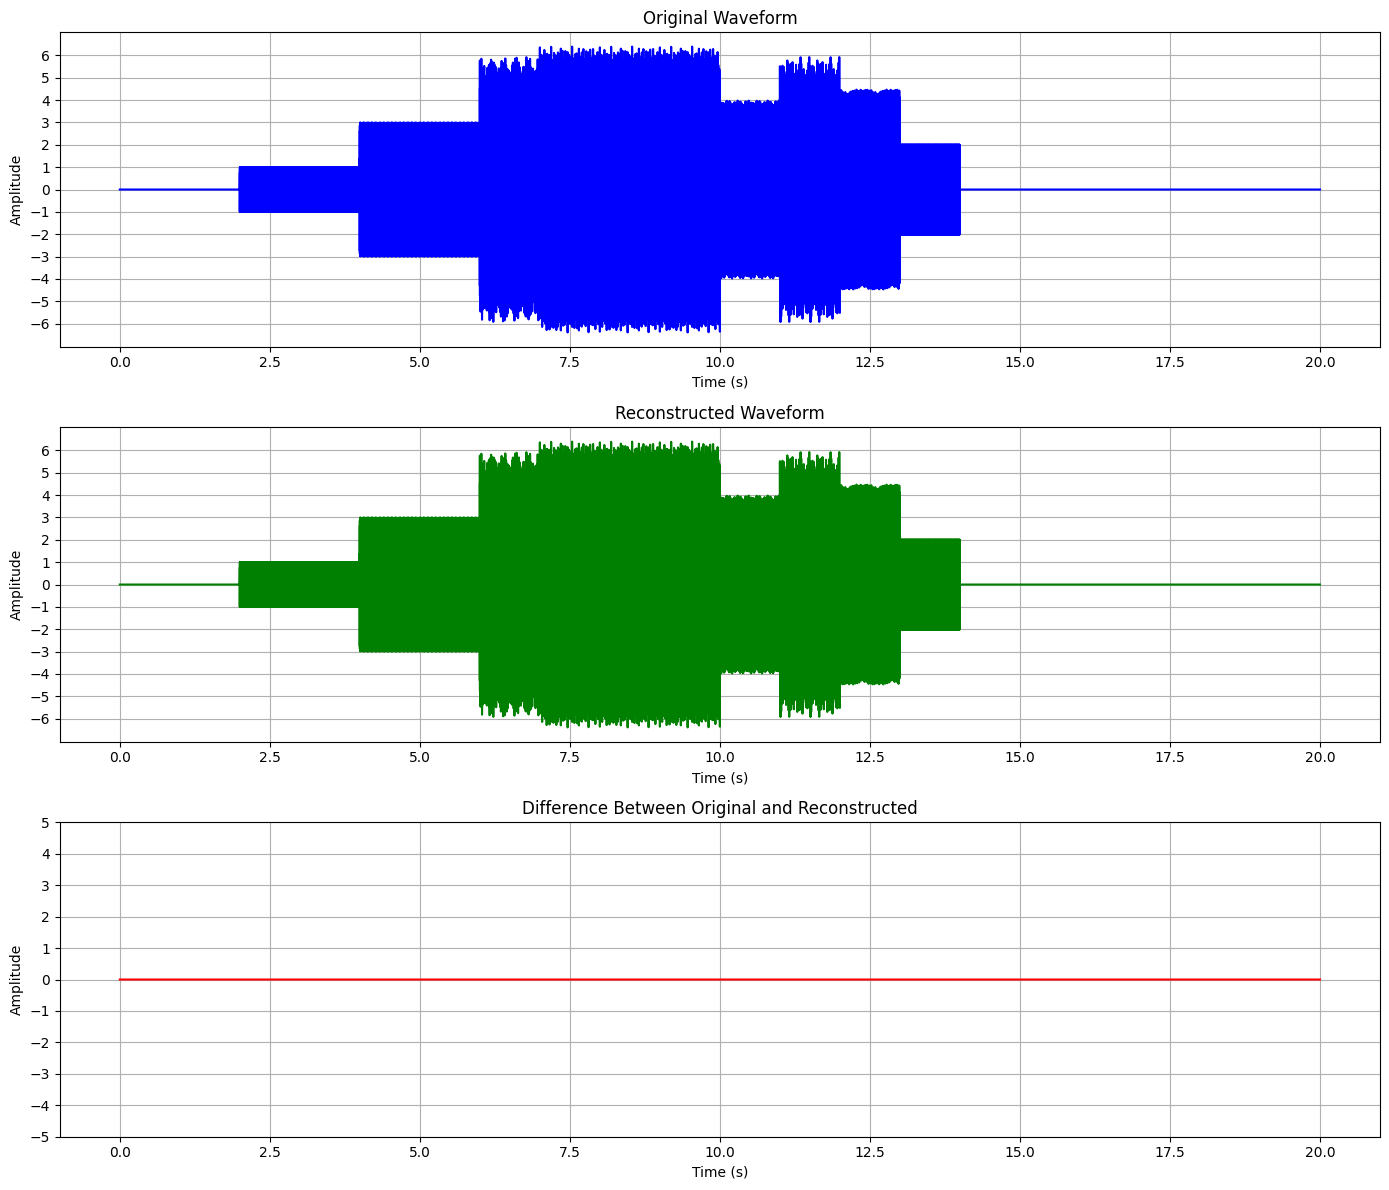

In [ ]:
duration = len(reconstructed_signal) / sample_rate  # Total duration of the audio
time = np.linspace(0, duration, len(reconstructed_signal), endpoint=False)
difference_audio = y - reconstructed_signal

# Create the plot
plt.figure(figsize=(14, 12))

# Original waveform
plt.subplot(3, 1, 1)
plt.plot(time, y, label="Original Wave", color='blue')
plt.title("Original Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.yticks(np.arange(int(np.min(y)), int(np.max(y)) + 1, 1))  # Y-axis in steps of 1

# Reconstructed waveform
plt.subplot(3, 1, 2)
plt.plot(time, reconstructed_signal, label="Reconstructed Wave", color='green')
plt.title("Reconstructed Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.yticks(np.arange(int(np.min(reconstructed_signal)), int(np.max(reconstructed_signal)) + 1, 1))  # Y-axis in steps of 1

# Difference waveform
plt.subplot(3, 1, 3)
plt.plot(time, difference_audio, label="Difference", color='red')
plt.title("Difference Between Original and Reconstructed")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.ylim(-5, 5)  # Set y-axis limits to -5 and 5
plt.grid(True)
plt.yticks(range(-5, 6))  # Set y-axis ticks from -5 to 5 (inclusive)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the mean square error (MSE)
mse = np.mean((y - reconstructed_signal) ** 2)

print("Mean Square Error (MSE):", mse)

Mean Square Error (MSE): 1.2638073295661494e-15


##### Question 2 [10 points]
Explain the logic you used to reconstruct the wav file. How did you find the frequencies? How did you figure out where they start and end?
How well did you do?

as learned in class, we needed to extract the following data for each subwave to reconstruct the general wave using sines:

1) the frequency

Acquiring the different frequencies involves using the FFT to transform the signal from the time domain to the frequency domain. The magnitude spectrum highlights the strength of each frequency component. By identifying peaks in the spectrum using criteria such as height, distance, and prominence, we extract the unique, non-zero frequencies that contribute to the overall wave.

2)the time interval

3) the amplitudes

4) the phases.

###Step 1: acquiring the different frequencies.
Acquiring the different frequencies involves using the FFT to transform the signal from the time domain to the frequency domain. The magnitude spectrum highlights the strength of each frequency component. By identifying peaks in the spectrum using criteria such as height, distance, and prominence, we extract the unique, non-zero frequencies that contribute to the overall wave.

###Step 2: acquiring the time intervals.
To figure out the time intervals of each subwave, we generated and analyzed the spectrogram of the original signal. The spectrogram provides a time-frequency representation, allowing us to visually identify when specific frequencies are active.

###Step 3: calculating the amplitudes.
From the hints, I knew that each frequency lasts was of value [0.5, 1.0, 1.5, 2.0, 2.5]  Using this information, I created a histogram and visually analyzed the different amplitude levels. The first and last subwaves had time intervals where they were active in isolation, making their amplitude calculations straightforward. For the remaining subwaves, I employed an elimination process similar to solving a system of linear equations. At each step, I recalculated and verified the amplitudes for the corresponding section of the signal.

###Step 4: phase.
phase was assumed to be 0, which the small error verified.

###Step 5: requnstracting the signal.
using the diffrent data, we summed 7 different sine waves to create the new signal, masked so it will only affect the relevant time interval.


###Step 6: evaluation.
we used 3 types of evalutition.
First, we plotted the new spectrogram to ensure that the correct frequencies were active at the correct times. Then, we plotted the histogram to verify that the summing of the sine waves created a wave identical to the original. Finally, we calculated the MSE to confirm that the mathematical difference between the waves was small, indicating that the mission was accomplished.
the result of the calculation was an almost identical reconstructed wave, with a mse of 1.2638073295661494e-15, which we consider irrelevent.








##### Question 3 [15 points]
Show some of your work on how you reconstructed the wav file. Show some actual code you used in understanding what the file is composed of? Visuals are nice.

In [ ]:
'answerd in question 1 and 2'

'Your Code Here'

##### Question 4 [15 points]
Resample your file so that only three or four different frequencies remain. Resample down and then back up to the original sample rate.

Hint:
- https://librosa.org/doc/main/generated/librosa.resample.html
- How can we see the frequencies?
- What is the relationship between the sample rate and the maximum frequency detectable?

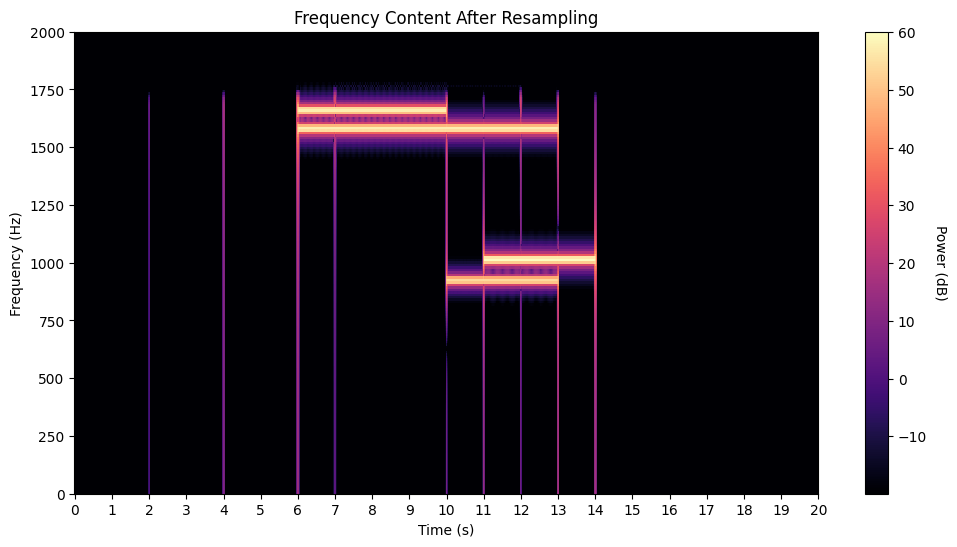

In [ ]:
# Downsample the signal
y_downsampled = librosa.resample(y, orig_sr=sample_rate, target_sr=3600)

# Resample back to the original sampling rate
y_resampled = librosa.resample(y_downsampled, orig_sr=3600, target_sr=sample_rate)

# Generate a spectrogram of the resampled signal
transformed_signal = librosa.stft(y_resampled)  # Perform STFT on the resampled signal
spectrogram_in_db = librosa.amplitude_to_db(np.abs(transformed_signal))  # Convert to dB scale

plt.figure(figsize=(12, 6))
librosa.display.specshow(spectrogram_in_db, sr=sample_rate, x_axis='time', y_axis='linear')
plt.ylim(0, 2000)  # Limit frequency to 2000 Hz
colorbar = plt.colorbar()
colorbar.set_label("Power (dB)", rotation=270, labelpad=15)

# Customize axis ticks
x_ticks = np.arange(0, 21, 1)
plt.xticks(x_ticks)

# Add titles and labels
plt.title("Frequency Content After Resampling")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()



The relationship between the sample rate and the frequencies in the signal is explained by the **Nyquist theorem**, which states that the highest frequency that can be preserved in a digital signal is half of the sampling rate, referred to as the **Nyquist frequency**. By resampling the audio to 3600 Hz, we ensured that only frequencies of 1800 Hz or lower remain in the signal.

The spectrogram plot helps us visualize the frequencies that remain after resampling. In this plot, the x-axis represents time, the y-axis represents frequency, and the intensity (brightness) indicates the amplitude of the frequencies. This allows us to confirm that only the most prominent frequencies are retained in the signal after the resampling process.


##### Question 5 [15 points]
Generate phase for your file using GriffinLim.
Show the following:
- Your waveform after stft and then istft
- Your waveform after 0 iteration of GL
- Your waveform after GL
- The difference between the original and the 0 iter version
- The difference between the original and the GM version
- The difference between the original and the stft-istft version
 - Note that doing STFT and back looses some information so you may need to crop your original vector to match the sizes

Hint:
- https://librosa.org/doc/main/generated/librosa.griffinlim.html
- How can we see the frequencies?
- What is the relationship between the sample rate and the maximum frequency detectable?

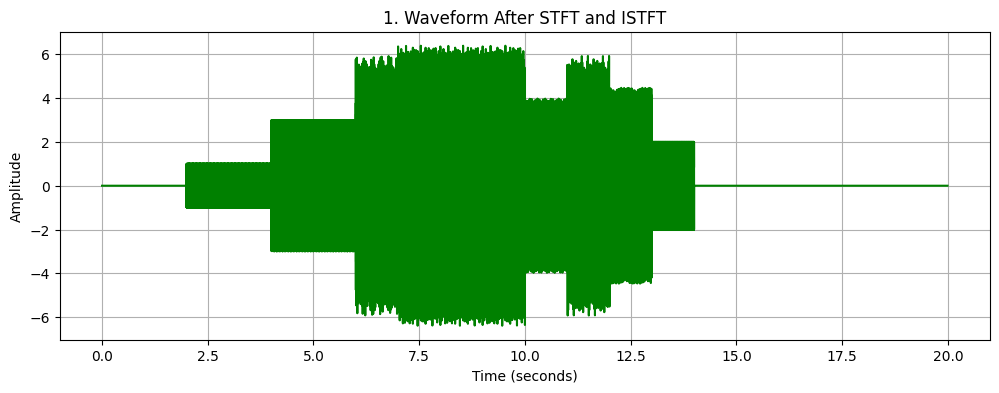

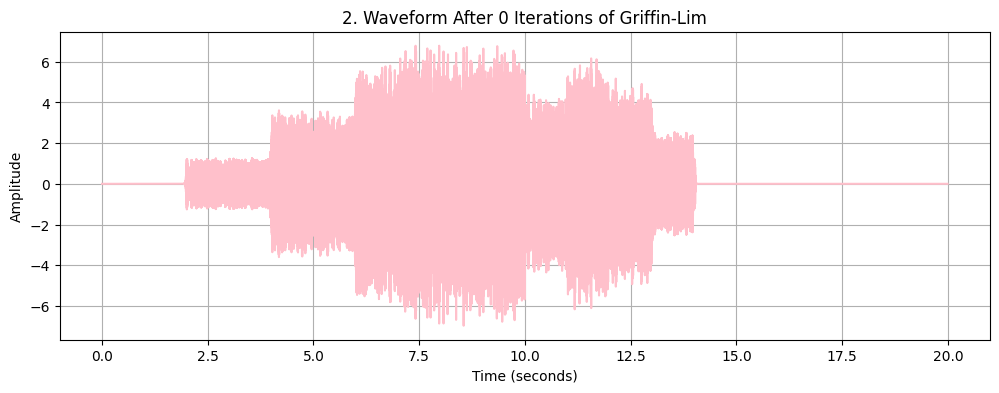

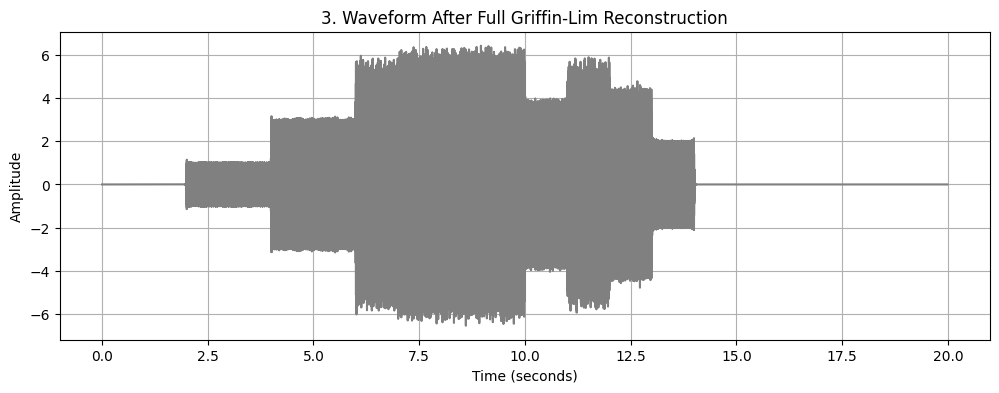

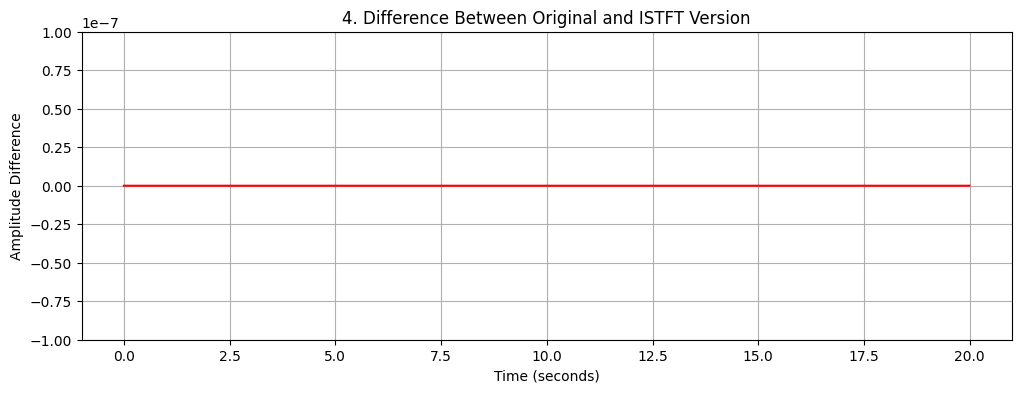

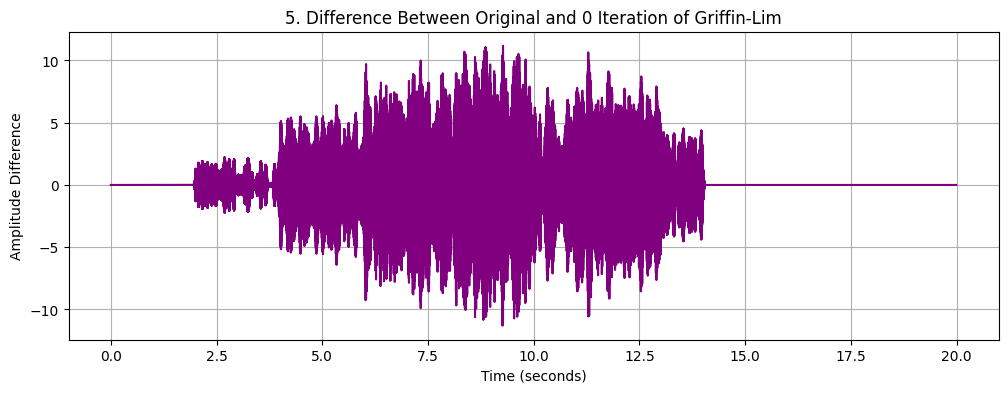

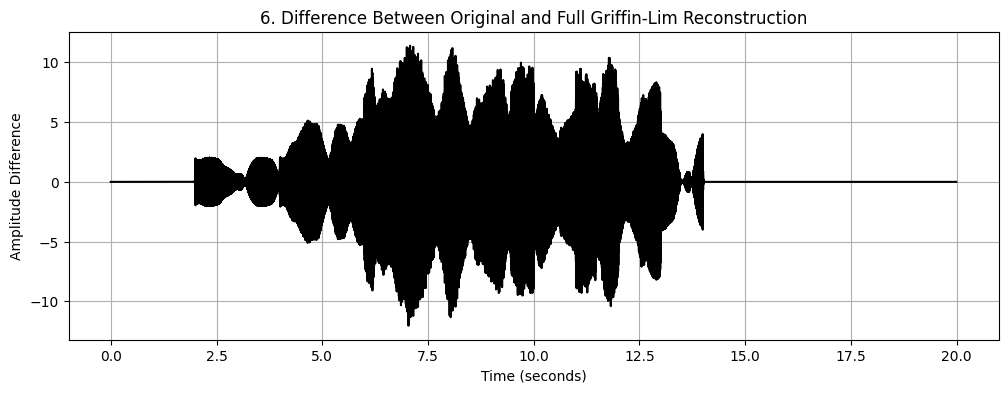

Perfect Reconstruction (ISTFT Result):


Griffin-Lim Reconstruction (Full Iterations):


In [ ]:

# Backup the reconstructed signal
backup_signal = reconstructed_signal

# -----------------------------------------------------------------------------
# 1. Waveform after STFT and ISTFT
stft_result = librosa.stft(reconstructed_signal)
istft_result = librosa.istft(stft_result)

plt.figure(figsize=(12, 4))
plt.plot(np.linspace(0, len(istft_result) / sample_rate, len(istft_result)), istft_result, color='green')
plt.title('1. Waveform After STFT and ISTFT')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# -----------------------------------------------------------------------------
# 2. Waveform after 0 iterations of Griffin-Lim
magnitude = np.abs(stft_result)
gl_one_iter = librosa.griffinlim(magnitude, n_iter=1)

plt.figure(figsize=(12, 4))
plt.plot(np.linspace(0, len(gl_one_iter) / sample_rate, len(gl_one_iter)), gl_one_iter, color='pink')
plt.title('2. Waveform After 0 Iterations of Griffin-Lim')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# -----------------------------------------------------------------------------
# 3. Waveform after Full Griffin-Lim Reconstruction
gl_full = librosa.griffinlim(magnitude)

plt.figure(figsize=(12, 4))
plt.plot(np.linspace(0, len(gl_full) / sample_rate, len(gl_full)), gl_full, color='gray')
plt.title('3. Waveform After Full Griffin-Lim Reconstruction')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# -----------------------------------------------------------------------------
# 4. Difference Between Original and ISTFT Version
min_len = min(len(istft_result), len(reconstructed_signal))
istft_result = istft_result[:min_len]
reconstructed_signal = reconstructed_signal[:min_len]
diff_istft = reconstructed_signal - istft_result

plt.figure(figsize=(12, 4))
plt.plot(np.linspace(0, len(diff_istft) / sample_rate, len(diff_istft)), diff_istft, color='red')
plt.title('4. Difference Between Original and ISTFT Version')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude Difference')

plt.ylim(-1e-7, 1e-7)

ax = plt.gca()
ax.ticklabel_format(style='scientific', axis='y', scilimits=(-1, 1))

plt.grid()
plt.show()

# -----------------------------------------------------------------------------
# 5. Difference Between Original and 0 Iteration of Griffin-Lim
min_len = min(len(gl_one_iter), len(reconstructed_signal))
gl_one_iter = gl_one_iter[:min_len]
reconstructed_signal = reconstructed_signal[:min_len]

diff_gl_one_iter = reconstructed_signal - gl_one_iter

plt.figure(figsize=(12, 4))
plt.plot(np.linspace(0, len(diff_gl_one_iter) / sample_rate, len(diff_gl_one_iter)), diff_gl_one_iter, color='purple')
plt.title('5. Difference Between Original and 0 Iteration of Griffin-Lim')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude Difference')
plt.grid()
plt.show()

# -----------------------------------------------------------------------------
# 6. Difference Between Original and Full Griffin-Lim Reconstruction
min_len = min(len(gl_full), len(reconstructed_signal))
gl_full = gl_full[:min_len]
reconstructed_signal = reconstructed_signal[:min_len]

diff_gl_full = reconstructed_signal - gl_full

plt.figure(figsize=(12, 4))
plt.plot(np.linspace(0, len(diff_gl_full) / sample_rate, len(diff_gl_full)), diff_gl_full, color='black')
plt.title('6. Difference Between Original and Full Griffin-Lim Reconstruction')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude Difference')
plt.grid()
plt.show()

# -----------------------------------------------------------------------------
# Listen to results
# 1. Perfect reconstruction (after ISTFT)
print("Perfect Reconstruction (ISTFT Result):")
display(Audio(data=istft_result, rate=sample_rate))

# 2. Griffin-Lim reconstruction (Full Iterations)
print("Griffin-Lim Reconstruction (Full Iterations):")
display(Audio(data=gl_full, rate=sample_rate))


##### Question 6 [10 points]

Describe the difference between the Griffith & Lim and the perfect reconstruction. Does it sound similar? Can you see the difference in the waveform?

When comparing the Griffin-Lim (GL) reconstruction to the perfectly reconstructed audio, it is nearly impossible to distinguish any differences by simply listening. Both versions sound remarkably similar to the human ear. However, a closer analysis of the waveforms reveals noticeable differences. The perfect reconstruction aligns almost seamlessly with the original signal, showing minimal deviations. In contrast, the GL reconstruction exhibits small inaccuracies, primarily caused by phase inconsistencies in the sinusoidal components. These phase mismatches introduce slight distortions, making the GL waveform appear marginally noisier than the original, even though the auditory perception remains unaffected.

##### Question 7 [20 points]

Please record a 2-5 minute video of yourself explaining questions 1 to 6.

If you are shy (or have a bad hairday) you can use filters to augment or cover your face. Please submit it as a public google drive url.

We have recorded a video explaining questions 1 to 6 as requested. You can view it using the link below:

[Click here to view the explanation video](https://drive.google.com/file/d/1uljOGJywYSN769H3b_yby16o9buM_5tq/view?usp=sharing)